In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
def droping(a,df):
    for i in a:
        df.drop(i,axis=1,inplace=True)

droping(["PassengerId"],df)
y = test["PassengerId"]
droping(['Cabin','Name',"PassengerId","Ticket"],test)

df.dropna(subset = ["Embarked"],inplace=True)
test.dropna(subset = ["Fare"],inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [ ]:
df.isnull().sum()

In [210]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [14]:
print(df.shape,test.shape)

(889, 8) (417, 7)


In [15]:
df = df.replace({"Sex":{"male":1,"female":2},"Embarked":{"S":-1,'C':0,"Q":1}})
test = test.replace({"Sex":{"male":1,"female":2},"Embarked":{"S":-1,'C':0,"Q":1}})

In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [17]:
scaler = StandardScaler()
scaler.fit(df.drop("Survived",axis=1))
df_nonsur = scaler.transform(df.drop("Survived",axis=1))
test = scaler.transform(test)

In [31]:
df_nonsur = pd.DataFrame(df_nonsur)
test = pd.DataFrame(test)


,0,1,2,3,4,5,6
0,0.825209,-0.735342,-0.563674,0.431350,-0.474326,-0.500240,-0.569684
1,-1.572211,1.359911,0.669217,0.431350,-0.474326,0.788947,1.003139
2,0.825209,1.359911,-0.255451,-0.475199,-0.474326,-0.486650,-0.569684
3,-1.572211,1.359911,0.438050,0.431350,-0.474326,0.422861,-0.569684
4,0.825209,-0.735342,0.438050,-0.475199,-0.474326,-0.484133,-0.569684
...,...,...,...,...,...,...,...
884,-0.373501,-0.735342,-0.178396,-0.475199,-0.474326,-0.384475,-0.569684
885,-1.572211,1.359911,-0.794841,-0.475199,-0.474326,-0.042213,-0.569684
886,0.825209,1.359911,-0.101340,0.431350,2.006119,-0.174084,-0.569684
887,-1.572211,-0.735342,-0.255451,-0.475199,-0.474326,-0.042213,1.003139


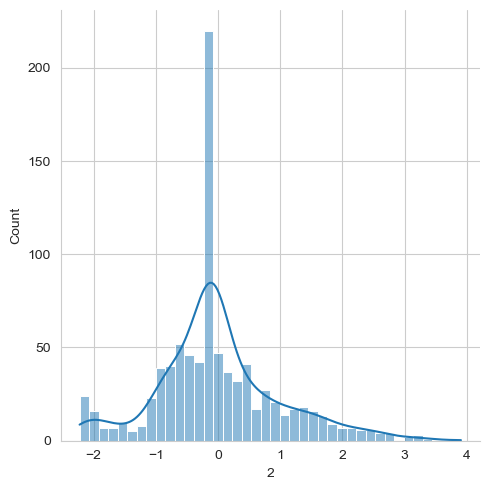

In [19]:
sns.displot(x=2,data=df_nonsur,kde=True,rug=False,bins=40)

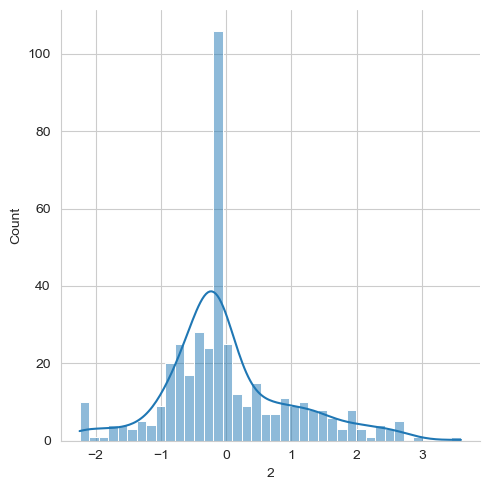

In [20]:
sns.displot(x=2,data=test,kde=True,rug=False,bins=40)

In [219]:
df_nonsur.describe()

,0,1,2,3,4,5,6
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-2.437745e-16,2.357819e-16,2.717486e-16,-3.197043e-17,-4.795564e-17,1.398706e-16,-1.138946e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-1.572211e+00,-7.353420e-01,-2.226536e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01,-5.696840e-01
25%,-3.735013e-01,-7.353420e-01,-5.636741e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01,-5.696840e-01
50%,8.252086e-01,-7.353420e-01,-1.013399e-01,-4.751991e-01,-4.743259e-01,-3.551972e-01,-5.696840e-01
75%,8.252086e-01,1.359911e+00,4.380499e-01,4.313502e-01,-4.743259e-01,-2.207954e-02,1.003139e+00
max,8.252086e-01,1.359911e+00,3.905556e+00,6.777195e+00,6.967010e+00,9.668551e+00,2.575963e+00


<Axes: xlabel='Age', ylabel='Survived'>

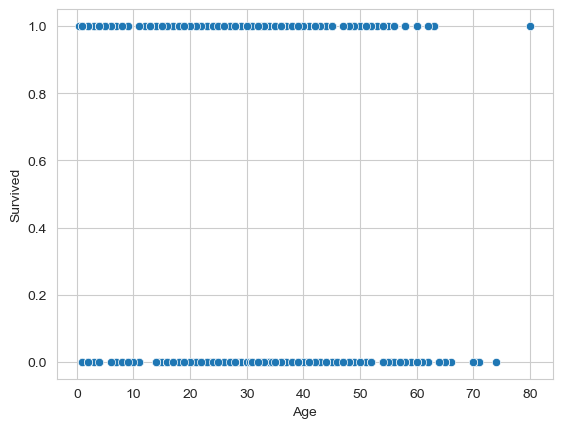

In [21]:
sns.scatterplot(data=df,x="Age",y="Survived")

In [24]:
polyreg = PolynomialFeatures(degree=2)
polyreg.fit(df_nonsur)

PolynomialFeatures()

In [37]:
df_notic_poly = polyreg.transform(df_nonsur)
df_notic2_poly = polyreg.transform(test)

from sklearn.linear_model import LogisticRegression
poly = LogisticRegression()
poly.fit(df_notic_poly,df_notic['Survived'])
y_pred = poly.predict(df_notic2_poly)
final=pd.DataFrame({"PassengerId":ids.values,
                  "Survived":y_pred
                  })
final.to_csv("titanic_polylogistic.csv",index=False)

In [32]:
df_notic_poly

array([[ 1.00000000e+00,  8.25208629e-01, -7.35342031e-01, ...,
         2.50239809e-01,  2.84978590e-01,  3.24539877e-01],
       [ 1.00000000e+00, -1.57221121e+00,  1.35991138e+00, ...,
         6.22436750e-01,  7.91423304e-01,  1.00628834e+00],
       [ 1.00000000e+00,  8.25208629e-01,  1.35991138e+00, ...,
         2.36828159e-01,  2.77236689e-01,  3.24539877e-01],
       ...,
       [ 1.00000000e+00,  8.25208629e-01,  1.35991138e+00, ...,
         3.03052936e-02,  9.91729614e-02,  3.24539877e-01],
       [ 1.00000000e+00, -1.57221121e+00, -7.35342031e-01, ...,
         1.78190400e-03, -4.23451205e-02,  1.00628834e+00],
       [ 1.00000000e+00,  8.25208629e-01, -7.35342031e-01, ...,
         2.40269786e-01, -1.26266784e+00,  6.63558282e+00]])

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_notic_scale, df_notic['Survived'])
y_pred = logreg.predict(df_notic2_scale)
final=pd.DataFrame({"PassengerId":ids.values,
                 "Survived":y_pred
                 })
final.to_csv("titanic_logistic.csv",index=False)